In [ ]:
!pip install grad-cam

In [ ]:
from torchvision.models import vgg16
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from PIL import Image
import requests
import numpy as np
import torch
import cv2
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/ImageNet'
paths = []
for r, d, f in os.walk(path):
    for file in f:
        if file.endswith(".JPEG"):
            paths.append(os.path.join(r, file))

In [ ]:
model = vgg16(pretrained=True)
target_layers = [model.features[-1]]

In [ ]:
def GCAM(path, size, model, target_layers, label, plus = True, target=False):   
    viz = []
    for i in path:
      rgb_img = cv2.imread(i, 1)[:, :, ::-1]
      rgb_img = cv2.resize(rgb_img, (size, size))
      rgb_img = np.float32(rgb_img) / 255
      input_tensor = preprocess_image(rgb_img, mean=[0.5, 0.5, 0.5],
                                          std=[0.5, 0.5, 0.5])
      # Construct the CAM object once, and then re-use it on many images:
      if plus:
        cam = GradCAMPlusPlus(model=model, target_layers=target_layers)
      else:
        cam = GradCAM(model=model, target_layers=target_layers)

      if target:
         targets = [ClassifierOutputTarget(label)]
      else:
         targets = None

      # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
      grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

      # In this example grayscale_cam has only one image in the batch:
      grayscale_cam = grayscale_cam[0, :]
      visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
      viz.append(visualization)
    return viz

In [ ]:
def viz(q):    
    plt.figure(figsize=(15,15)) 

    for i in range(len(q)):

       plt.subplot(5,5,i+1) 
       plt.imshow(q[i])

    plt.show()

In [ ]:
wynik_gradcam = GCAM(paths,224,model,target_layers, label = 0, plus=False)

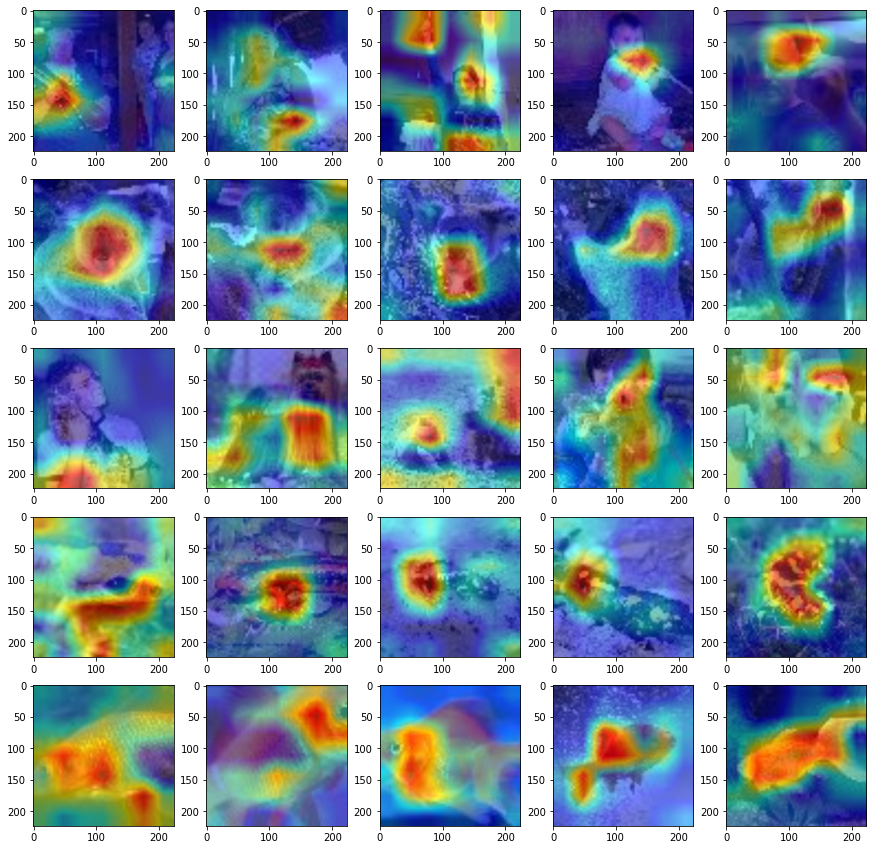

In [ ]:
viz(wynik_gradcam)

In [ ]:
wynik_gradcam_plusplus = GCAM(paths,224,model,target_layers, label = 0, plus=True)

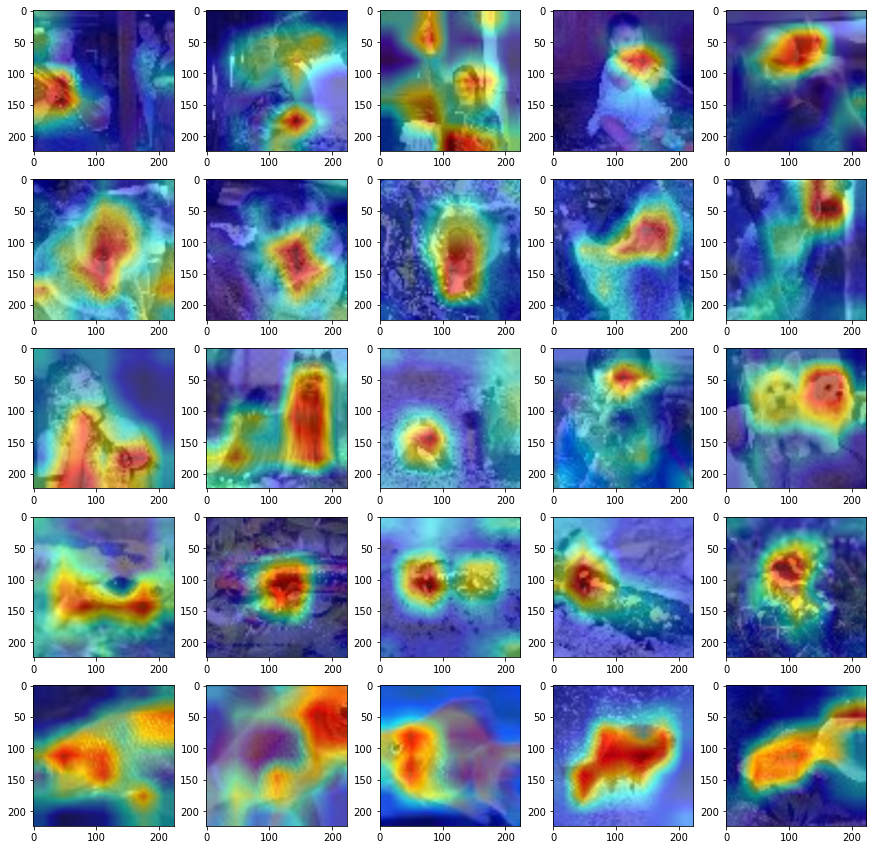

In [ ]:
viz(wynik_gradcam_plusplus)

In [ ]:
wynik_gradcam_goldfish = GCAM(paths,224,model,target_layers, label = 1, plus=False, target = True)

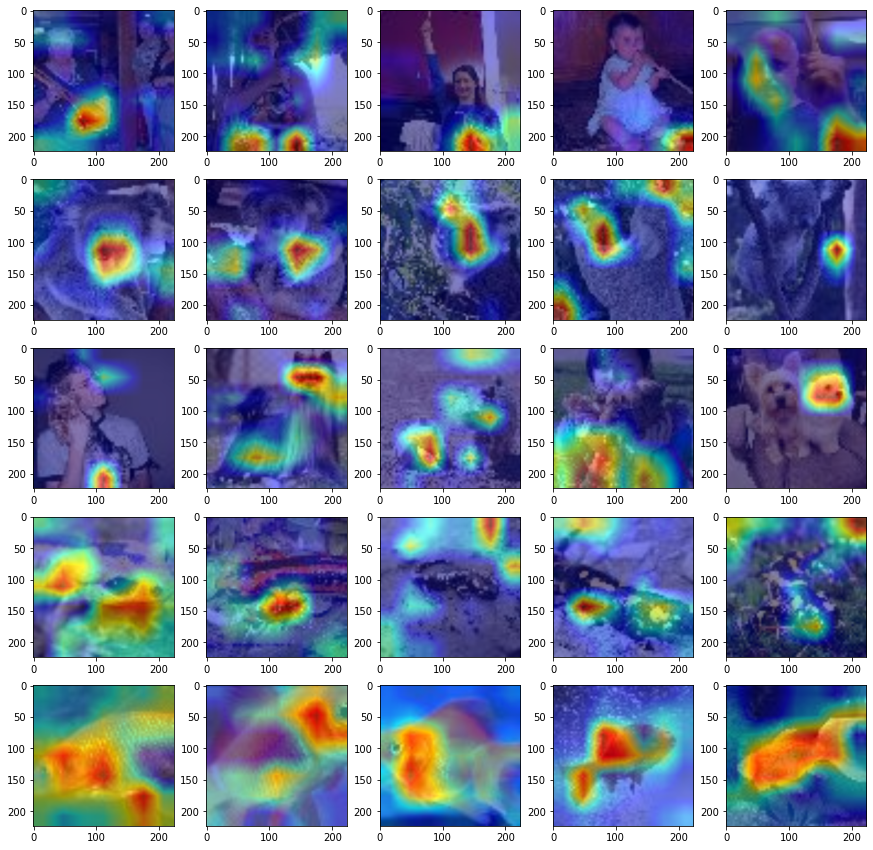

In [ ]:
viz(wynik_gradcam_goldfish)

In [ ]:
wynik_gradcam_plusplus_goldfish = GCAM(paths,224,model,target_layers, label = 1, plus=True, target = True)

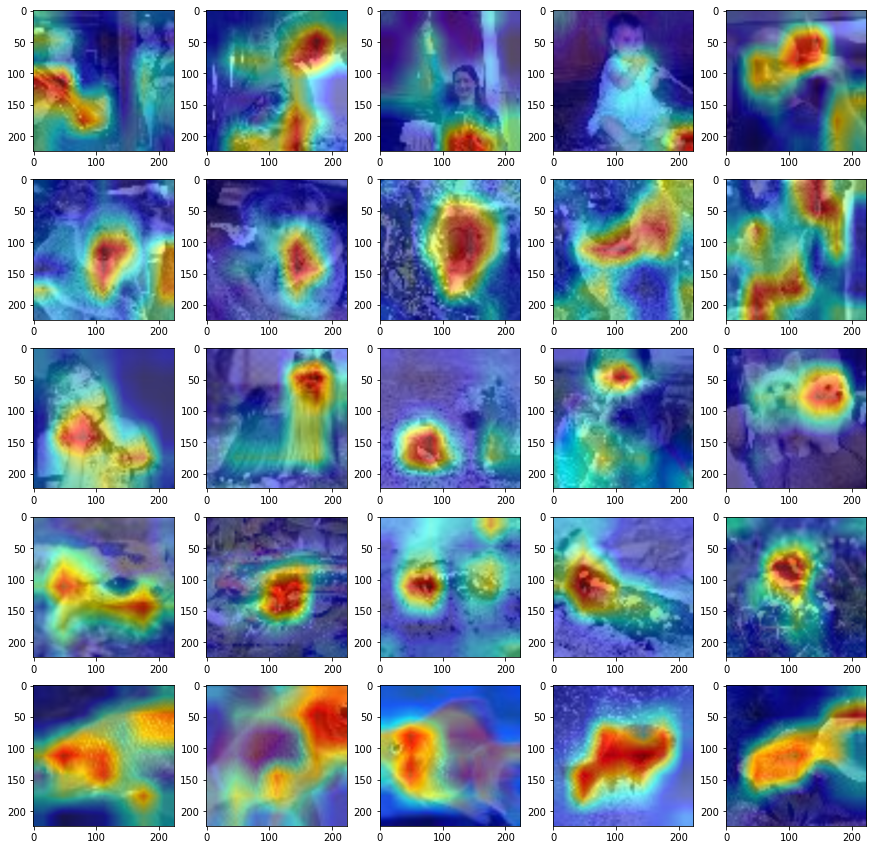

In [ ]:
viz(wynik_gradcam_plusplus_goldfish)